# LAB 06.02 - NMF face search

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.xai4eng/master/content/init.py
import init; init.init(force_download=False); init.get_weblink()


enabling encryption...
encryption enabled
replicating local resources
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


In [ ]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="L06.02" )
init.get_weblink()

username: davida.torres@udea.edu.co
password: ··········
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


## Dataset

we will use the faces dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:

import numpy as np
faces = np.load("local/data/faces.npy")
faces.shape


(535, 361)

In [ ]:
def plot_faces(faces):
    assert len(faces)<=30, "can only plot at most 30 faces"
    plt.figure(figsize=(15,2))
    for i in range(len(faces)):
        plt.subplot(2,15,i+1)
        plt.imshow(faces[i].reshape(19,19), cmap=plt.cm.Greys_r)
        plt.xticks([]); plt.yticks([])

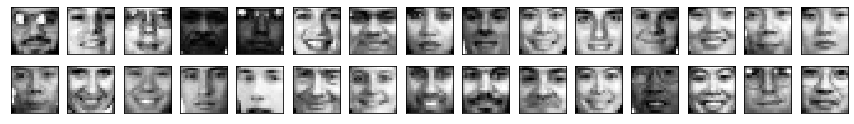

In [ ]:

plot_faces(np.random.permutation(faces)[:30])


## Task 1: Distance function for a vector

complete the following function so that given a vector $v \in \mathbb{R}^n$ and a `numpy` array $X \in \mathbb{R}^{m\times n}$ (whose rows are vectors of the same size as $v$) returns a new array $\in \mathbb{R}^m$ with the Euclidean distance between $v$ and each vector in $X$.

Recall that the Euclidean distance between vectors $z=[z_0,...z_{n-1}]$ and $w=[w_0,...,w_{n-1}]$ is given by

$$\text{distance}(z,w) = \sqrt{\sum_{i=0}^{n-1} (z_i-w_i)^2}$$


**hint**: use [`np.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) to compute a distance between two vectors

**challenge**: solve it using one line of code.

**note**: your function must return a 1D numpy array of dimension $m$, not a list.

for instance, for the following values of $v$ and $X$

    X = array([[9, 5, 1, 3, 8, 3, 3, 3, 9, 2],
               [9, 7, 0, 7, 9, 1, 4, 7, 3, 6],
               [8, 0, 0, 5, 0, 5, 5, 1, 1, 5],
               [8, 2, 9, 5, 6, 0, 8, 7, 2, 8],
               [0, 6, 3, 0, 6, 6, 1, 2, 8, 0]])
                  
    v = np.array([9, 7, 0, 7, 9, 1, 4, 7, 3, 6])


you should get the following result

    array([ 9.74679434,  0.        , 13.89244399, 11.91637529, 16.40121947])


In [ ]:
X = np.array([[9, 5, 1, 3, 8, 3, 3, 3, 9, 2],
           [9, 7, 0, 7, 9, 1, 4, 7, 3, 6],
           [8, 0, 0, 5, 0, 5, 5, 1, 1, 5],
           [8, 2, 9, 5, 6, 0, 8, 7, 2, 8],
           [0, 6, 3, 0, 6, 6, 1, 2, 8, 0]])
 
v = np.array([9, 7, 0, 7, 9, 1, 4, 7, 3, 6])
distances(v, X)

array([ 9.74679434,  0.        , 13.89244399, 11.91637529, 16.40121947])

In [ ]:
np.linalg.norm(X[4)

12.083045973594572

In [ ]:
def distances(v, X):
    
    result = []
    for i in range(0,X.shape[0]):
      result.append(np.linalg.norm(X[i]-v))
    return np.array(result)

check manually your code

In [ ]:
X = np.random.randint(10, size=(5,10))
v = X[1]

print ("X=\n", X)
print ("\nv=", v)
distances(v, X)

X=
 [[1 7 2 2 4 1 3 5 3 5]
 [7 1 9 0 6 3 8 8 0 9]
 [4 1 4 2 9 3 7 4 1 1]
 [4 5 2 1 2 5 3 9 4 2]
 [4 1 4 1 1 1 5 2 0 2]]

v= [7 1 9 0 6 3 8 8 0 9]


[13.856406460551018,
 0.0,
 11.357816691600547,
 13.638181696985855,
 12.569805089976535]

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Positions of closest vectors

complete the following function so that given $v$ and $X$ as previously, returns the positions of the $n$ closest vectors to $v$ in $X$.

**hint**: use the [`np.argsort`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) function

**challenge**: solve it using one line of code

for the example $v$ and $X$ above you should get the following outputs

    >> closest(v, X, 2)
    array([1, 0])

    >> closest(v, X, 3)
    array([1, 0, 3])


In [ ]:
def closest(v, X, n):
    assert n<len(X), "n must at most the number of vectors in X"
    result2 = []
    def distances(v, X):
      
      result = []
      for i in range(0,X.shape[0]):
        result.append(np.linalg.norm(X[i]-v))
      return np.array(result)
    dis=distances(v,X)
    print(dis)
    result2 = np.argsort(dis)[:n]
    return result2

check manually your code

In [ ]:
X = np.random.randint(10, size=(5,10))
v = X[1]

print ("X=\n", X)
print ("\nv=", v,"\n\n")
print (closest(v, X, 2))
print (closest(v, X, 3))

X=
 [[2 8 9 5 5 7 2 1 3 7]
 [0 0 3 6 7 4 2 0 6 8]
 [9 4 5 3 1 2 5 7 0 2]
 [2 3 3 6 8 2 3 2 1 6]
 [1 5 9 8 1 6 0 6 0 1]]

v= [0 0 3 6 7 4 2 0 6 8] 


[11.35781669  0.         16.73320053  7.21110255 15.19868415]
[1 3]
[11.35781669  0.         16.73320053  7.21110255 15.19868415]
[1 3 0]


### observe now how we can use your functions to search for faces similar to any other face

TARGET FACE


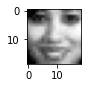

In [ ]:

plt.figure(figsize=(1,1))
fi = 314 # np.random.randint(len(faces)) # 314 
face = faces[fi]
plt.imshow(faces[fi].reshape(19,19), cmap=plt.cm.Greys_r)
print ("TARGET FACE")


[2327.80024916 2391.40230827 2286.85657618 3346.00149432 3275.86339764
 1914.71277219 1850.97325751 1782.94475517 1821.57514256 2895.39703668
 2885.48540111 2797.52283279 2258.62303185 2235.27380873 2025.2898558
 1994.86966993 2215.80481992 2307.58878486 2013.6407326  2180.26397484
 1953.98592625 2109.77036665 2007.65335653 2028.41637737 1886.57679409
 2003.04418324 1932.62696866 2096.36638019 2197.85190584 2185.11624405
 2072.71657493 2064.69319755 2157.51083427 1899.48808893 1873.86152103
 2022.65469124 1919.47102088 2308.72475622 2295.93118364 2315.93803889
 2398.01980809 2319.52042457 2391.36948212 2035.82538544 2032.62687181
 1851.57419511 1786.68799739 1901.87696763 1940.70657236 1981.33212764
 1791.9601     1918.38942866 1880.47307878 2214.78012453 2197.2942452
 3335.31497763 3586.54973477 3622.17627953 3627.75977705 3589.21579179
 2616.30961471 2594.305302   2610.84507392 2429.82530236 2474.62441595
 2643.3075871  2755.30452038 2720.2584436  2708.26789665 2768.92993772
 2709.75

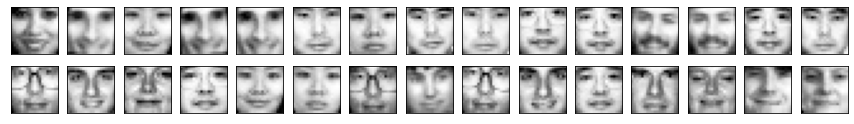

In [ ]:

plot_faces(faces[closest(face, faces, 30)])
print ("SIMILAR FACES")


But they do not look so similar, this is because we are doing comparison **pixel by pixel**. We will fix this in the next task

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Use NMF to find similar faces

Make the comparison in the faces space resulting from transforming them using NMF. For this you have to:

- create an instance of NMF with `n_components=30, init="random", random_state=0`
- fit the instance with $X$
- transform $X$
- transform $v$
- return the positions of closest $n$ vectors in the transformed $X$ to the transformed $v$

For the target face above, you should get the following

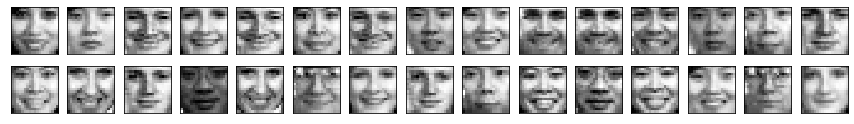

In [ ]:

from IPython.display import Image
Image(filename='local/imgs/similar-images2.png')


In [ ]:
def find_similar(v,X,n):
    
    from sklearn.decomposition import NMF
    
    def closest(v, X, n):
        assert n<len(X), "n must at most the number of vectors in X"
        result2 = []
        def distances(v, X):
          
          result = []
          for i in range(0,X.shape[0]):
            result.append(np.linalg.norm(X[i]-v))
          return np.array(result)
        dis=distances(v,X)
        print(dis)
        result2 = np.argsort(dis)[:n]
        return result2   
        
    
    nmf = NMF(n_components=30, init="random", random_state=0)
    nmf=nmf.fit(X) ## your code here. call the 'fit' method
    Xt = nmf.transform(X) # use nmf to transform X
    vt = (nmf.transform(v.reshape(1,-1))) # use nmf to transform v .. you will have to use reshape like this v.reshape(1,-1)
    
    result = closest(vt,Xt,n)
    
    return result

check manually your answer

[1.62740050e+01 1.53356868e+01 1.90211318e+01 1.51029796e+01
 1.51134179e+01 2.43931374e+01 2.18629782e+01 2.04226649e+01
 2.48306268e+01 2.20033769e+01 1.89138706e+01 2.08571039e+01
 1.99154903e+01 1.85065986e+01 2.09478702e+01 2.31068861e+01
 2.14186043e+01 1.97896936e+01 2.26670391e+01 1.59860338e+01
 1.63756947e+01 2.49602757e+01 2.02428848e+01 2.18295898e+01
 1.44196207e+01 1.95231848e+01 2.05431747e+01 2.48240989e+01
 1.87476387e+01 1.72330125e+01 1.82382535e+01 1.66075449e+01
 1.65622175e+01 2.14329347e+01 2.14870159e+01 2.09040681e+01
 2.03192552e+01 1.99625346e+01 2.05682530e+01 1.95972547e+01
 1.86298707e+01 1.61319022e+01 1.93853589e+01 2.19717094e+01
 2.28950538e+01 2.14893708e+01 2.02508208e+01 1.98038924e+01
 2.18110553e+01 2.23427978e+01 1.34302014e+01 1.96847268e+01
 2.12518671e+01 1.69349245e+01 1.79549192e+01 1.82300441e+01
 1.56207970e+01 1.79479000e+01 1.68983333e+01 1.78926785e+01
 1.93690959e+01 2.09544023e+01 2.20178479e+01 1.70924927e+01
 1.76456278e+01 2.225461

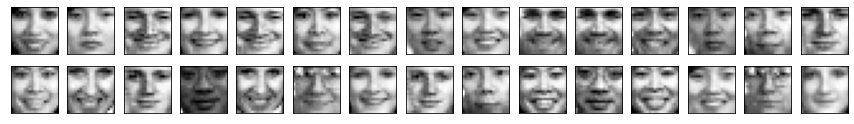

In [ ]:

plot_faces(faces[find_similar(face, faces, 30)])


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");